# Analysis of Social media and K-Pop: reasons for its rise and popularity

### Kari Huang, Sooboree Jeung

### INTRODUCTION

The objective of this project will be to analyze the reasons of the rise of K-Pop through surveys obtainied from social media apps in 2019. According to some aritcle, the kpop industry gained popularity after the phenomenal release of Psy's 'Gangnam Style' in 2012

#### Required Tools
The following libraries were used for this project:
<ol>
<li>requests</li>
<li>pandas</li>
<li>numpys</li>
</ol>

This project consists of 5 steps: \
Data collection/curation + parsing (if necessary)  \
Data management/representation \
Exploratory data analysis \
Hypothesis testing \
Communication of insights attained \



### 1. DATA COLLECTION:

In this step of the project, we collect data tables from external sources such as websites or databases. Such is accomplished by using requests.get(

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import re

In [210]:
# read excel spreadsheet
df = pd.read_csv("data.csv", sep=',')

df.drop(['Timestamp','Has consuming K-Pop affected your personal life in the following ways?','What is the craziest thing you have done in your pursuit and love for K-Pop?','Has K-Pop led you to pursue any of the following?','Is K-Pop popular in your country? ','Has consuming K-Pop taken away most of your time?','Has consuming K-Pop taken away most of your time?', 'Which country are you from?','Why do you like K-Pop?', 'Do you watch K-Pop Youtube videos?', 'Do you listen to K-Pop male groups more than girl group songs?'], inplace=True, axis=1)

# replace non ascii characters
for col in df:
    df[col] = df[col].str.replace('â€™','\'')

# rename columns
df.rename(columns={'Which is your favourite K-Pop group?':'FAV_GROUP',
                   'On an average, in one year, how much do you spend on K-Pop merchandise?':'MONEY_SPENT',
                   'How old are you?':'AGE',
                   'What is your gender?':'GENDER',
                  'When did you start listening to K-Pop?':'YEARS_LISTENED',
                  'How many hours do you spend listening to K-Pop?':'HOURS_LISTNED_DAILY',
                 'If you do watch K-Pop music videos, how long do you spend watching them?':'HOURS_WATCHED_DAILY' ,
                  'What do you do to keep up with K-Pop news?':'K-POP_NEWS',
                   'If you do spend money on K-Pop merchandise, where do you get money from?':'SOURCE_MONEY',
                   'Do you attend K-Pop concerts?':'CONCERT_ATTENDANCE',
                   'What is your profession?':'PROFESSION',
                   'Would you say that you are obsessed with K-Pop?':'OBSESSION'
                   
                  }, inplace=True)

df['HOURS_WATCHED_DAILY'] = df['HOURS_WATCHED_DAILY'].fillna(0)

df

,FAV_GROUP,YEARS_LISTENED,HOURS_LISTNED_DAILY,HOURS_WATCHED_DAILY,OBSESSION,K-POP_NEWS,Have you experienced any positive effects after consuming K-Pop?,MONEY_SPENT,SOURCE_MONEY,CONCERT_ATTENDANCE,AGE,PROFESSION,GENDER
0,BTS,1 -2 years ago,5 or more,2-3 hours,Not sure,Subscribe to K-Pop news sites;Subscribe to You...,Reduced stress/anxiety/depression,50 - 100 $,I have a full - time job,Yes,15 - 20 years,Sales,Female
1,BTS,3-4 years ago,2-4 hours,2-3 hours,Yes,Subscribe to K-Pop news sites;Subscribe to You...,Made friends who are like-minded,Below 50$,Working part-time,"I want to, but the K-Pop groups don't come to ...",15 - 20 years,Student,Female
2,BTS;MONSTA X,More than 4 years ago,2-4 hours,2-3 hours,No,Subscribe to K-Pop news sites;Join K-pop socia...,Made friends who are like-minded,50 - 100 $,Working part-time,Yes,15 - 20 years,Student,Female
3,BTS,3-4 years ago,5 or more,3-4 hours,No,Subscribe to K-Pop news sites;Subscribe to You...,Reduced stress/anxiety/depression,50 - 100 $,Working part-time,Yes,21 - 26 years,Student,Female
4,BTS,3-4 years ago,5 or more,2-3 hours,Not sure,Subscribe to Youtube channels,Reduced stress/anxiety/depression,100 - 200$,Parents,"I want to, but the K-Pop groups don't come to ...",15 - 20 years,Student,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,MONSTA X,3-4 years ago,5 or more,3-4 hours,Not sure,Subscribe to Youtube channels,Reduced stress/anxiety/depression,I don't spend anything on merchandise,I don't,"I want to, but the K-Pop groups don't come to ...",15 - 20 years,Student,Female
236,BTS,More than 4 years ago,2-4 hours,0,No,Twitter,Made friends who are like-minded,"$2,000",Working part-time,Yes,15 - 20 years,Student,Female
237,BTS;GOT 7,Less than a year ago,5 or more,2-3 hours,Yes,Subscribe to Youtube channels;Join K-pop socia...,Reduced stress/anxiety/depression,I don't spend anything on merchandise,Parents,No,10 - 14 years,Student,Female
238,BTS,More than 4 years ago,2-4 hours,2-3 hours,Not sure,Subscribe to Youtube channels;Join K-pop socia...,Made friends who are like-minded,Below 50$,Parents,Yes,15 - 20 years,Student,Female


In [223]:
#deal with the customized responses regarding the question "How much do you spend on K-Pop merchandise?"
df['MONEY_SPENT'] = df['MONEY_SPENT'].replace(["I don't spend anything on merchandise",
                                               "I would like to but I don't have money", 0], "0")
df['MONEY_SPENT'] = df['MONEY_SPENT'].replace(["Below 50$", 
                                               "Below 30$",
                                               "10?",
                                               "I spend less than $50 cuz I'm broke, but if I had money, I would probably spend $200+"], "less than $50")
df['MONEY_SPENT'] = df['MONEY_SPENT'].replace("50 - 100 $", "\$50 to \$100")
df['MONEY_SPENT'] = df['MONEY_SPENT'].replace("100 - 200$", "\$100 to \$200")
df['MONEY_SPENT'] = df['MONEY_SPENT'].replace(["More than $200",
                                               "I've spent 200-300 dollars, but i chose not to spend much more unless its clothing or a physical concert. Plus i rlly only ult stan 2 groups",
                                               " Never until Monsta X existed and it's about $300 a year "], "\$200 to \$300")
df['MONEY_SPENT'] = df['MONEY_SPENT'].replace("Kpop is an expensive hobby I go to concerts and buy albums so I would say I've spent more than 1k", '$1000 or more')
df['MONEY_SPENT'] = df['MONEY_SPENT'].replace("$2,000", '$2000 or more')
df['MONEY_SPENT'] = df['MONEY_SPENT'].replace("I've spent probably over $5,000 total on kpop merch (including tickets)",'$5000 or more')
df['MONEY_SPENT'] = df['MONEY_SPENT'].replace(["A lot I don't even want to know how much", 
                                               "Depends but usually not a lot. ",
                                               "I don't buy everything. I buy things if I feel I will use them ",
                                               "I've only ever bought merchandise from the two concerts I've been too and that's it.", 
                                               "A lot I don't even want to know how much",
                                               "Because I'm younger I don't have the money to spend on official kpop mercy but I do buy smaller things to represent the groups.",
                                               "I've bought some albums over the past few years but its just like a xmas / bday thing i do so twice a year i just purchase however many i can",
                                               "What if you don't know, since everything you own that is K-Pop related were all gifts?", 
                                               "Depends month to month and what i want to buy"], "Unknown")
print(df.MONEY_SPENT)

159          0
186          0
25           0
237          0
235          0
        ...   
129    Unknown
84     Unknown
34     Unknown
54     Unknown
212    Unknown
Name: MONEY_SPENT, Length: 240, dtype: category
Categories (9, object): ['0', 'less than $50', '\$50 to \$100', '\$100 to \$200', ..., '$1000 or more', '$2000 or more', '$5000 or more', 'Unknown']


In [218]:
#reorder dataframe by money spent
spent_order = ['0', 'less than $50', '\$50 to \$100', '\$100 to \$200', '\$200 to \$300', '$1000 or more', '$2000 or more', '$5000 or more', 'Unknown']
df['MONEY_SPENT']= pd.Categorical(df['MONEY_SPENT'], categories=spent_order)
df = df.sort_values('MONEY_SPENT')

#get each age range money spent value
spent = []
for age, age_group in df.groupby(['AGE']):
    arr = []
    for name, group in age_group.groupby(['MONEY_SPENT']):
        arr.append(len(group))
    spent.append(arr)

age_10_14 = np.array(spent[0])
age_15_20 = np.array(spent[1])
age_21_26 = np.array(spent[2])
age_27_30 = np.array(spent[3])

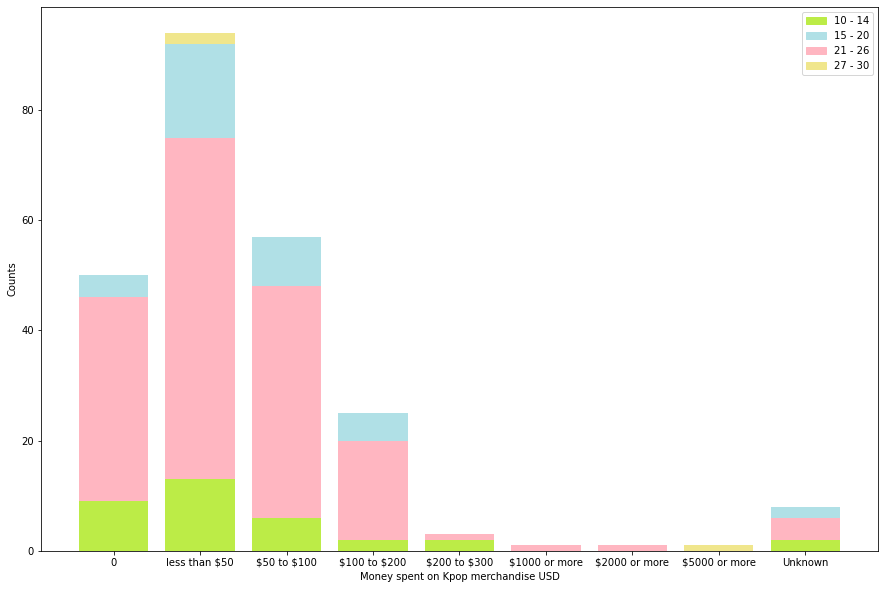

In [219]:
#plot bar in stack manner
plt.figure(figsize=(15,10))
plt.bar(df['MONEY_SPENT'].unique(), age_10_14, color="#BCEC47")
plt.bar(df['MONEY_SPENT'].unique(), age_15_20, bottom=age_10_14, color="lightpink")
plt.bar(df['MONEY_SPENT'].unique(), age_21_26, bottom=age_10_14+age_15_20, color="powderblue")
plt.bar(df['MONEY_SPENT'].unique(), age_27_30, bottom=age_10_14+age_15_20+age_21_26, color="khaki")

plt.xlabel("Money spent on Kpop merchandise USD")
plt.ylabel("Counts")
handles = [mpatches.Patch(color=color, label=label) for label, color in
           [('10 - 14', '#BCEC47'), ('15 - 20', 'powderblue'),('21 - 26', 'lightpink'), ('27 - 30', 'khaki')]]
plt.legend(handles=handles, loc='upper right', frameon=True)
plt.show()

In [214]:
#calculate average money spent based on the gender
bin = df[['GENDER', 'MONEY_SPENT']].copy(deep=True)
spent_dict = {'0':0, 'less than $50':25, '\$50 to \$100':75, '\$100 to \$200':150, '\$200 to \$300':150,'$1000 or more':1000, '$2000 or more':2000, '$5000 or more':5000, 'Unknown':np.nan}
bin['AVG_MONEY_SPENT'] = bin.MONEY_SPENT.map(spent_dict)
avg_spent = bin.groupby(['GENDER']).apply(lambda x: x.AVG_MONEY_SPENT.sum()/len(x))

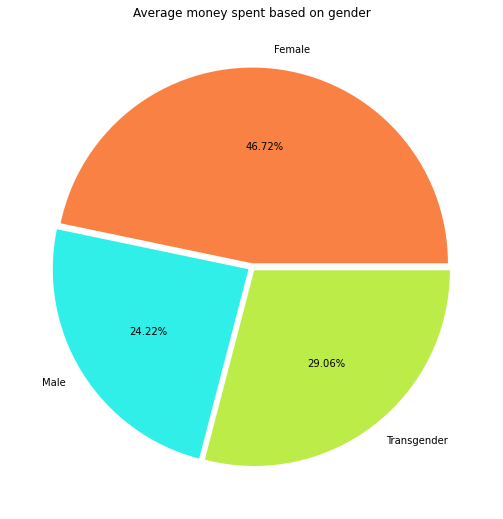

In [215]:
gender = ['Female', 'Male', 'Transgender']
chart_explode = [0.02]*3
plt.figure(figsize=(12, 9))
plt.pie(avg_spent, labels=gender, explode=chart_explode, colors=['#F98143', '#2FEFE8', '#BCEC47'], autopct='%1.2f%%')
plt.title("Average money spent based on gender")
plt.show()

In [238]:
# bar plot hours listened vs hours watched 

df_bar_plot = df[['HOURS_LISTNED_DAILY', 'HOURS_WATCHED_DAILY', 'MONEY_SPENT', 'YEARS_LISTENED']].copy()

df_bar_plot['HOURS_LISTNED_DAILY'] = df_bar_plot['HOURS_LISTNED_DAILY'].replace(['Almost all day','All day','Most of the time.',
                                                               'Everyday, constantly ','Nearly every hour unless im sleeping',
                                                               'The whole day almost','All the time.','Hours on end',
                                                               'Over half of my day (12+ hours)',
                                                               'It\'s mainly the only music I listen to anymore, I listen to music all the time'], '5 or more')
                                                               
to_delete_values = [    
'depends if i\'m in the mood for it',

'Everyday',
'Any chance that i get. (I dont really count the hours) ',
'I mix in other songs in other languages too so very Day is different ',
'Idk depends on my mood. But I can liste during multiple hours definitely. ',
'It\'s depend on day. Usually one or two hours, sometimes more, sometimes, when I overeat kpop I need to do break. ',

'Everyday ',
'Eh',
'I don\'t rlly listen to music, music is like food to me. When I crave a song, I listen to it. So probably less than an hour? When Monsta X has comebacks I do stream (but it\'s just playing in the background sometimes my earphones are plugged in so I don\'t actually hear it)... I listen to it for almost the whole day I guess... gotta get those views and wins ',

'Whenever I\'m listening to music, basically',
'Every time but only when I get the chance cause I\'m busy with school .',
'Anytime I listen to music that\'s all I listen to',
'24-Jul',
'Anytime I listen to music that\'s all I listen to']


df_bar_plot = df_bar_plot[df_bar_plot.HOURS_LISTNED_DAILY.isin(to_delete_values) == False]

to_delete_values_years_listened = ['7 years',
'7 years ago',
'7 years ago',
'8+ years ago',
'9 years coming April',
'9 years, since 2010',
'About 6 years ago, I got introduced to 2ne1 which was their song called â€œI am the bestâ€. So sad they disbanded']

df_bar_plot['YEARS_LISTENED'] = df_bar_plot['YEARS_LISTENED'].replace(to_delete_values_years_listened, 'More than 4 years ago')
df_bar_plot['YEARS_LISTENED'] = df_bar_plot['YEARS_LISTENED'].replace('I\'ve been listening to it all my life basically, my cousins are Asian, and I\'m mexican, so people think I\'m just a koreaboo, when in reality I\'ve only ever listened to korean and Chinese music',np.nan)

df_bar_plot['HOURS_LISTNED_DAILY' == '5 or more', 'numeric_hours_listened']=5
print(df_bar_plot)

x_train = df_bar_plot.drop('YEARS_LISTENED', axis =1)
y_train = df_bar_plot['YEARS_LISTENED']
test_data = df_bar_plot[df_bar_plot['YEARS_LISTENED'].isnull()]
print(test_data)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
x_test = test_data.drop('YEARS_LISTENED')
y_pred = lr.predict(x_test)
print(y_pred)

for cell in df_bar_plot['YEARS_LISTENED']:
    print(cell)



    HOURS_LISTNED_DAILY HOURS_WATCHED_DAILY MONEY_SPENT  \
159           2-4 hours              1 hour           0   
186           2-4 hours              1 hour           0   
25            2-4 hours              1 hour           0   
237           5 or more           2-3 hours           0   
235           5 or more           3-4 hours           0   
..                  ...                 ...         ...   
223           5 or more           2-3 hours     Unknown   
129           2-4 hours              1 hour     Unknown   
84            5 or more              1 hour     Unknown   
34            2-4 hours           2-3 hours     Unknown   
212           2-4 hours              1 hour     Unknown   

            YEARS_LISTENED  (False, numeric_hours_listened)  
159  More than 4 years ago                                5  
186          3-4 years ago                                5  
25   More than 4 years ago                                5  
237   Less than a year ago                 

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'

In [190]:
#create model that predict how much money people might spend on Kpop merchandise
#deal with all categorical data

In [270]:
model_df = pd.get_dummies(df, columns=['AGE','GENDER'])